In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [2]:
whData = pd.read_csv('weight-height.csv')
whData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
males_h = whData[whData['Gender'] == 'Male']['Height']
females_h = whData[whData['Gender'] == 'Female']['Height']
print(len(males_h))
print(len(females_h))

5000
5000


In [4]:
mcount, mdevision = np.histogram(males_h, bins=100)
fcount, fdevision = np.histogram(females_h, bins=100)

In [5]:
mcount

array([  1,   0,   0,   0,   1,   0,   0,   3,   2,   3,   1,   5,   5,
         4,   6,   5,   8,   9,   9,  12,  14,   9,  16,  16,  19,  29,
        34,  27,  20,  37,  47,  56,  60,  63,  59,  70,  77,  78,  88,
        89,  96, 101, 125, 131, 127, 129, 148, 148, 150, 135, 122, 168,
       145, 139, 151, 134, 124, 112, 144,  93, 133, 109,  98, 115, 113,
       103,  83,  79,  62,  61,  46,  50,  40,  43,  42,  34,  28,  30,
        16,  20,  13,  11,   8,  11,   5,   8,   4,   7,   8,   4,   3,
         1,   3,   0,   0,   1,   0,   2,   1,   1], dtype=int64)

In [6]:
mdevision

array([58.40690493, 58.61282331, 58.81874168, 59.02466005, 59.23057843,
       59.4364968 , 59.64241518, 59.84833355, 60.05425192, 60.2601703 ,
       60.46608867, 60.67200705, 60.87792542, 61.0838438 , 61.28976217,
       61.49568054, 61.70159892, 61.90751729, 62.11343567, 62.31935404,
       62.52527241, 62.73119079, 62.93710916, 63.14302754, 63.34894591,
       63.55486429, 63.76078266, 63.96670103, 64.17261941, 64.37853778,
       64.58445616, 64.79037453, 64.9962929 , 65.20221128, 65.40812965,
       65.61404803, 65.8199664 , 66.02588478, 66.23180315, 66.43772152,
       66.6436399 , 66.84955827, 67.05547665, 67.26139502, 67.46731339,
       67.67323177, 67.87915014, 68.08506852, 68.29098689, 68.49690526,
       68.70282364, 68.90874201, 69.11466039, 69.32057876, 69.52649714,
       69.73241551, 69.93833388, 70.14425226, 70.35017063, 70.55608901,
       70.76200738, 70.96792575, 71.17384413, 71.3797625 , 71.58568088,
       71.79159925, 71.99751763, 72.203436  , 72.40935437, 72.61

In [7]:
kstest(mcount, fcount)

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

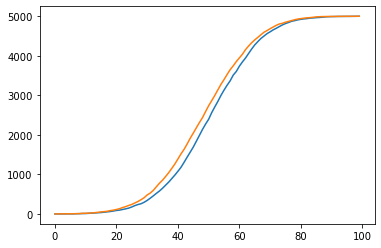

In [8]:
plt.plot(np.cumsum(mcount))
plt.plot(np.cumsum(fcount))

In [9]:
kstest(males_h.sort_values().reset_index(drop=True), females_h.sort_values().reset_index(drop=True), N=1000)

KstestResult(statistic=0.6664, pvalue=0.0)

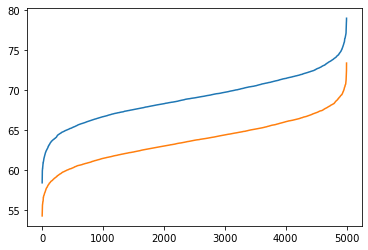

In [10]:
plt.plot((males_h.sort_values().reset_index(drop=True)))
plt.plot((females_h.sort_values().reset_index(drop=True)))

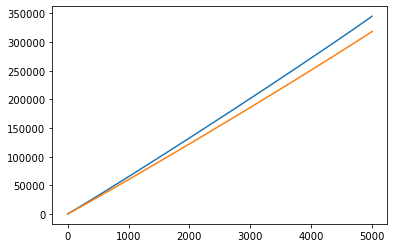

In [11]:
plt.plot(np.cumsum((males_h.sort_values().reset_index(drop=True))))
plt.plot(np.cumsum((females_h.sort_values().reset_index(drop=True))))

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([54.26313333, 54.45439785, 54.64566238, 54.8369269 , 55.02819143,
        55.21945595, 55.41072048, 55.601985  , 55.79324953, 55.98451405,
        56.17577858, 56.3670431 , 56.55830763, 56.74957216, 56.94083668,
        57.13210121, 57.32336573, 57.51463026, 57.70589478, 57.89715931,
        58.08842383, 58.27

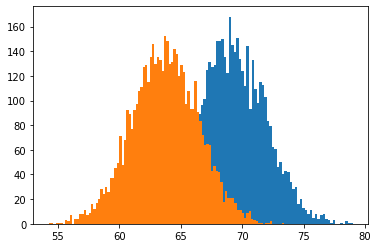

In [12]:
plt.hist((males_h.sort_values()), bins=100)
plt.hist((females_h.sort_values()), bins=100)

In [13]:
males_h.mean()

69.02634590621737

In [14]:
females_h.mean()

63.708773603424916

In [15]:
nmales_h = males_h - males_h.mean()

In [16]:
nfemales_h = females_h - females_h.mean()

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-9.44564028, -9.25437575, -9.06311123, -8.8718467 , -8.68058218,
        -8.48931765, -8.29805313, -8.1067886 , -7.91552408, -7.72425955,
        -7.53299502, -7.3417305 , -7.15046597, -6.95920145, -6.76793692,
        -6.5766724 , -6.38540787, -6.19414335, -6.00287882, -5.8116143 ,
        -5.62034977, -5.42

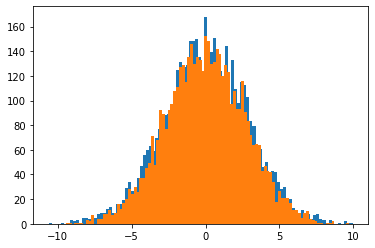

In [17]:
plt.hist((nmales_h.sort_values()), bins=100)
plt.hist((nfemales_h.sort_values()), bins=100)

In [18]:
kstest(nmales_h, nfemales_h)

KstestResult(statistic=0.0194, pvalue=0.3035775745288207)

In [19]:
kstest(nmales_h, 'norm')

KstestResult(statistic=0.23808525858975527, pvalue=7.336270444149125e-250)

In [20]:
nmales_h.mean()

4.6925663355068534e-14

In [21]:
nmales_h.std()

2.8633622286606513

In [22]:
ideal = norm.rvs(size=len(nmales_h), loc=nmales_h.mean(), scale=nmales_h.std())
ideal

array([ 0.89568265, -0.20672381,  0.58917727, ..., -7.24971855,
       -2.68012336,  1.37426667])

In [23]:
kstest(nmales_h, ideal)

KstestResult(statistic=0.0172, pvalue=0.45029268979401865)

In [24]:
# Masoud Kaviani